In [1]:
#remove .DS_Store
!rm /data/face_recog/.DS_Store
!rm /data/face_test/.DS_Store

rm: /data/face_recog/.DS_Store: No such file or directory
rm: /data/face_test/.DS_Store: No such file or directory


data/face_recog/joe_weisenthal.jpg
1 joe_weisenthal.jpg data/face_recog/joe_weisenthal.jpg


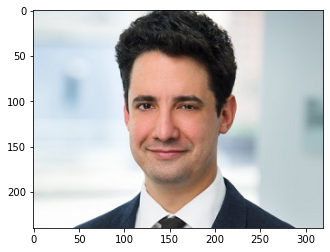

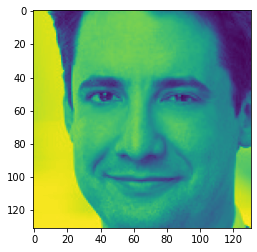

data/face_recog/sheri_ahn.jpg
2 sheri_ahn.jpg data/face_recog/sheri_ahn.jpg


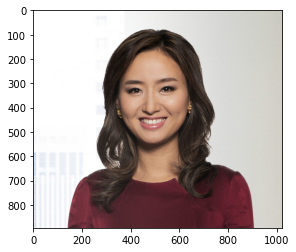

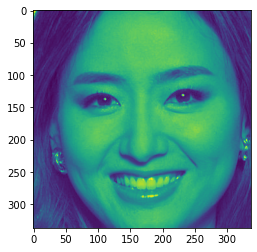

data/face_recog/david_gura.jpg
3 david_gura.jpg data/face_recog/david_gura.jpg


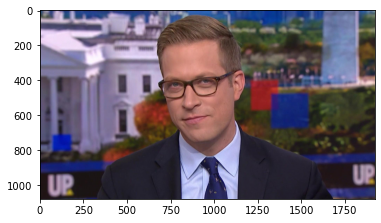

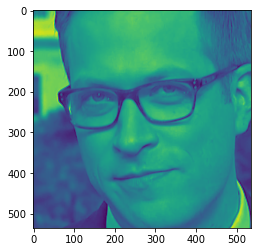

data/face_recog/romaine_bostick.jpg
4 romaine_bostick.jpg data/face_recog/romaine_bostick.jpg


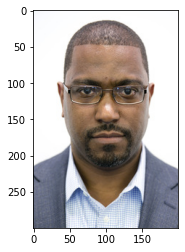

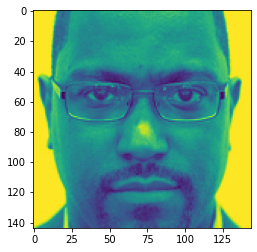

data/face_recog/tom_keene.jpg
5 tom_keene.jpg data/face_recog/tom_keene.jpg


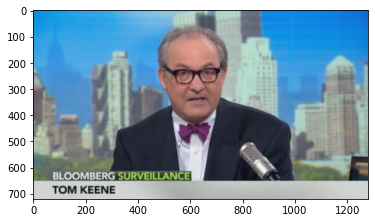

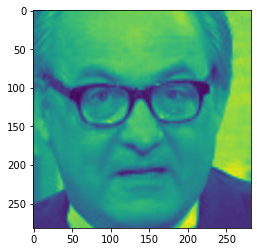

data/face_recog/guy_johnson.jpg
6 guy_johnson.jpg data/face_recog/guy_johnson.jpg


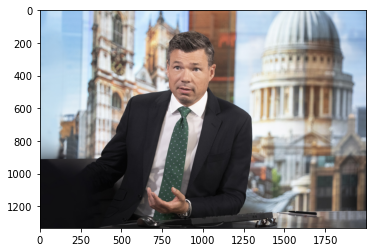

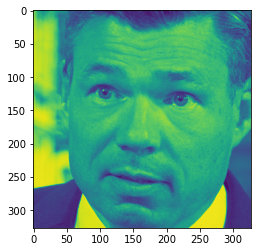

data/face_recog/scarlet_fu.jpg
7 scarlet_fu.jpg data/face_recog/scarlet_fu.jpg


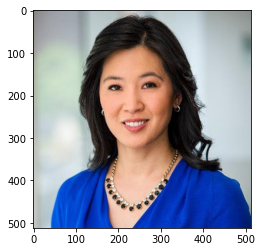

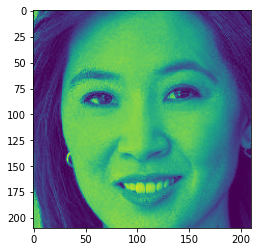

data/face_recog/david_ingles.jpg
8 david_ingles.jpg data/face_recog/david_ingles.jpg


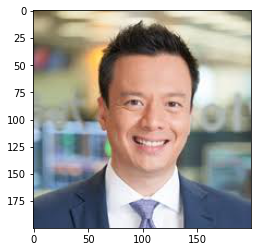

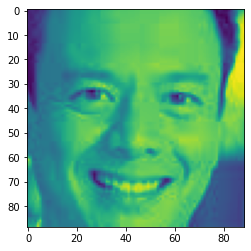

data/face_recog/vonnie_quinn.jpg
9 vonnie_quinn.jpg data/face_recog/vonnie_quinn.jpg


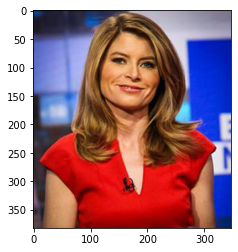

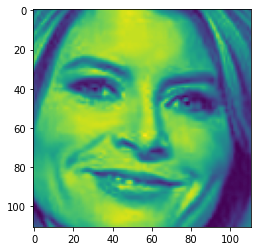

data/face_recog/alix_steel.jpg
10 alix_steel.jpg data/face_recog/alix_steel.jpg


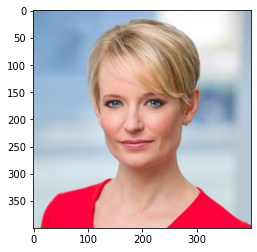

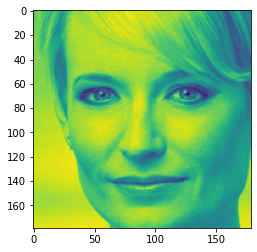

learning


In [1]:
### Exercise 3 face recognizer

import matplotlib
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #face_cascade = cv2.CascadeClassifier('haar/haarcascade_frontalface_alt.xml')
    face_cascade = cv2.CascadeClassifier('/Users/loi/opt/anaconda3/envs/cv-basics/share/OpenCV/haarcascades/haarcascade_frontalface_alt.xml')    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)
    (x, y, w, h) = faces[0]
    return gray[y:y+w, x:x+h], faces[0]

def prepare_training_data(data_folder_path):
    #faces = []
    #labels = []
    labels_names = dict()
    labels_faces = dict()
    
    i = 1
    subject_images_names = os.listdir(data_folder_path)
    
    for image_name in subject_images_names:
        if 'jpg' not in image_name: continue
        label = i
        image_path = data_folder_path + "/" + image_name
        
        print(image_path)
        print(label, image_name, image_path)
        image = cv2.imread(image_path)
        
        #image read
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) ####get rid of blue face
        plt.show() ####
        
        #detect face
        face, rect = detect_face(image)
        
        #store face
        if face is not None:
            #faces.append(face)
            #labels.append(label)
            labels_names[label] = image_name
            labels_faces[label] = face
        i+=1
        
        #face detected
        plt.imshow(face) ####
        plt.show() ####
        
    return labels_names, labels_faces

labels_names, labels_faces = prepare_training_data('data/face_recog')
labels = list(labels_names.keys())

faces = list(labels_faces.values())
labels = list(labels_faces.keys())
print('learning')
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(faces, np.array(labels))

detection


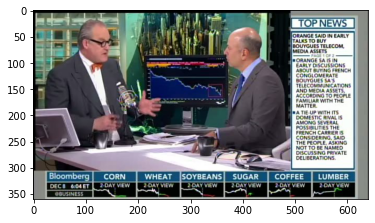

no faces detected


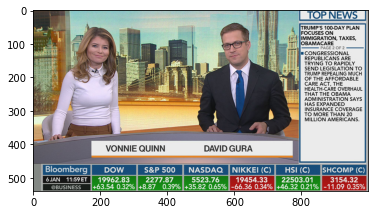

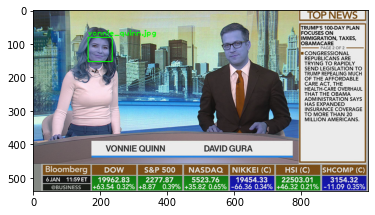

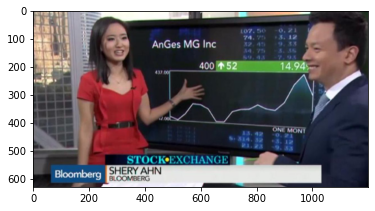

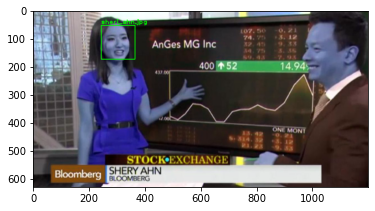

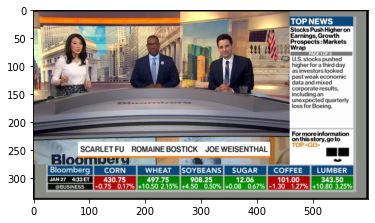

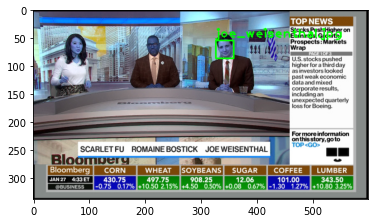

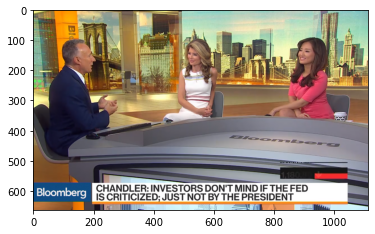

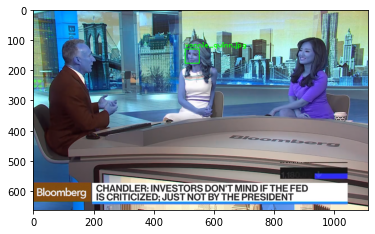

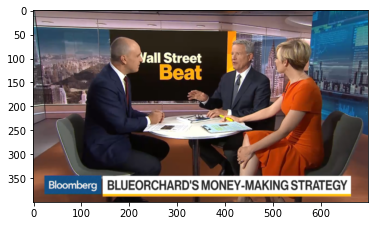

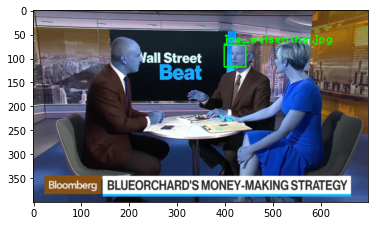

In [3]:
#subjects = ['','a','b']
print('detection')
#img = cv2.imread('group.jpg')

data_folder_path = 'data/face_test'
images_names = os.listdir('data/face_test')

for image_name in images_names:        
    if not any(ext in image_name for ext in ['jpg','png']): continue  
        
    image_path = data_folder_path + "/" + image_name
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #get rid of blue face

    plt.imshow(img) 
    plt.show() ####

    try:
        face, rect = detect_face(img)
        label = face_recognizer.predict(face)[0]
        label_text = labels_names[label]
        (x, y, w, h) = rect
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, label_text, (rect[0], rect[1]-5), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

        #cv2.imshow("Final_detected_image.jpg", img)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) ####
        plt.show() ####
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()

    except:
        print('no faces detected')